In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [3]:
ls

 AQ_paper_V1.docx             'Untitled drawing (2).gdraw'
'Colab Notebooks'/            'Untitled drawing - Bar chart 1.gsheet'
 RNNmodel.zip                 'Untitled drawing - Column chart 2.gsheet'
 SegThor2019dataset.zip       'Untitled drawing.gdraw'
 train.zip                    'Video 1.zip'
'Untitled drawing (1).gdraw'


In [4]:
!unzip Depressiontraintestdataset.zip

Archive:  Depressiontraintestdataset.zip
   creating: Depressiontraintestdataset/
  inflating: Depressiontraintestdataset/TestingEC.npy  
  inflating: Depressiontraintestdataset/TestingEO.npy  
  inflating: Depressiontraintestdataset/TestinglabelsEC.npy  
  inflating: Depressiontraintestdataset/TestinglabelsEO.npy  
  inflating: Depressiontraintestdataset/TrainingEC.npy  
  inflating: Depressiontraintestdataset/TrainingEO.npy  
  inflating: Depressiontraintestdataset/TraininglabelsEC.npy  
  inflating: Depressiontraintestdataset/TraininglabelsEO.npy  


In [5]:
import numpy as np
TrainingEC=np.load('/content/drive/My Drive/Depressiontraintestdataset/TrainingEC.npy')
TrainingEClabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TraininglabelsEC.npy')
testingEC=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestingEC.npy')
testingEClabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestinglabelsEC.npy')

TrainingEO=np.load('/content/drive/My Drive/Depressiontraintestdataset/TrainingEO.npy')
TrainingEOlabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TraininglabelsEO.npy')
testingEO=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestingEO.npy')
testingEOlabel=np.load('/content/drive/My Drive/Depressiontraintestdataset/TestinglabelsEO.npy')



In [8]:
print(TrainingEC.shape)
print(TrainingEClabel.shape)
print(testingEC.shape)
print(testingEClabel.shape)


(1512, 500, 19)
(1512, 2)
(378, 500, 19)
(378, 2)


In [9]:
print(TrainingEO.shape)
print(TrainingEOlabel.shape)
print(testingEO.shape)
print(testingEOlabel.shape)

(1512, 500, 19)
(1512, 2)
(378, 500, 19)
(378, 2)


In [10]:
# prepare dataset for 1DCNN model
temporal_dimension = TrainingEC.shape[1]
num_channels = TrainingEC.shape[2]

In [12]:
print(temporal_dimension)

500


In [13]:
print(num_channels)

19


In [14]:
# define or import basic layers from keras
from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dropout, Dense
import os
import scipy
from scipy import io, signal
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pywt
from matplotlib import pyplot as plt
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import coremltools
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [20]:
model1D = Sequential()
model1D.add(Conv1D(50, 10, activation='relu', input_shape=(temporal_dimension, num_channels))) # 50 outputfeature maps, 10 kernel size
#dir(model1D)

In [21]:
#model1D.summary()

In [27]:
num_classes = 2
############################# Define Network###########################33333
model1D = Sequential()
model1D.add(Conv1D(50, 10, activation='relu', input_shape=(temporal_dimension, num_channels)))
model1D.add(Conv1D(50, 10, activation='relu'))
model1D.add(MaxPooling1D(3))
model1D.add(Conv1D(100, 10, activation='relu'))
#model1D.add(Conv1D(160, 10, activation='relu'))
model1D.add(MaxPooling1D(3))
model1D.add(Conv1D(50, 20, activation='relu'))
model1D.add(GlobalAveragePooling1D())
#model.add(Dense(100, activation='relu'))
model1D.add(Dropout(0.5))
model1D.add(Dense(num_classes, activation='sigmoid'))
print(model1D.summary())

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model1.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]
model1D.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['acc'])

BATCH_SIZE = 100
EPOCHS = 100

history = model1D.fit(TrainingEC,
                      TrainingEClabel,
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.1,
                      verbose=1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 491, 50)           9550      
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 482, 50)           25050     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 160, 50)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 151, 100)          50100     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 50, 100)           0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 31, 50)            100050    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 50)               

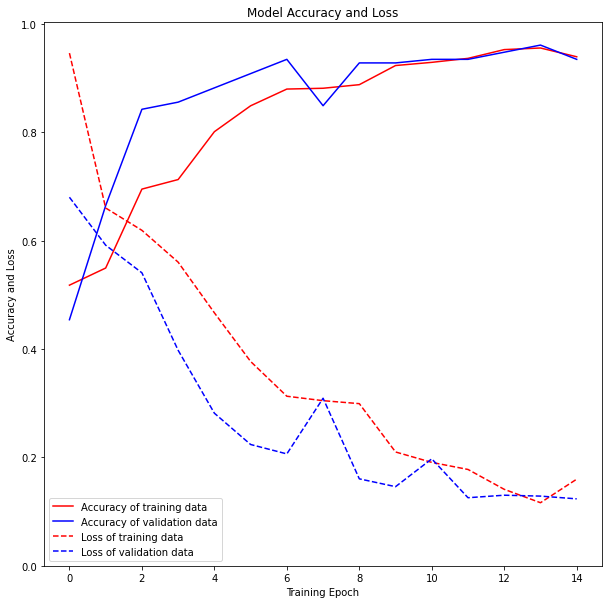

In [28]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['acc'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_acc'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [29]:
# testing the model
#print(testingEO.shape)
#print(testingEOlabel.shape)
score = model1D.evaluate(testingEO, testingEOlabel, verbose=1)

print('\nAccuracy on test data: %0.2f' % score[1])
print('\nLoss on test data: %0.2f' % score[0])

12/12 [==============================] - 0s 13ms/step - loss: 0.5193 - acc: 0.8624

Accuracy on test data: 0.86

Loss on test data: 0.52


In [37]:
# confusion matrix
LABELS = ['Control','MDD']
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(2, 2))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

(1512, 2)


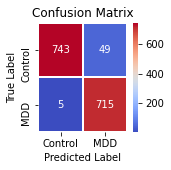

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       792
           1       0.94      0.99      0.96       720

    accuracy                           0.96      1512
   macro avg       0.96      0.97      0.96      1512
weighted avg       0.97      0.96      0.96      1512



In [40]:
# predcition on training set
y_pred_train = model1D.predict(TrainingEC)
print(y_pred_train.shape)
#print(classification_report(TrainingEClabel, y_pred_train))
max_y_pred_train = np.argmax(y_pred_train, axis=1)
max_y_train = np.argmax(TrainingEClabel, axis=1)
#print(max_y_pred_train.shape)
#print(max_y_train.shape)
show_confusion_matrix(max_y_train, max_y_pred_train)
print(classification_report(max_y_train, max_y_pred_train))

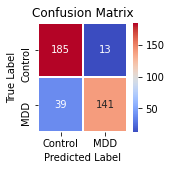

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       198
           1       0.92      0.78      0.84       180

    accuracy                           0.86       378
   macro avg       0.87      0.86      0.86       378
weighted avg       0.87      0.86      0.86       378



In [41]:
# prediciton on testing set
y_pred_test = model1D.predict(testingEO)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(testingEOlabel, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))